# Chargement des données : à adapter à votre projet !

Dans mon projet **toto**, j'ai choisi de classifier des images associées à 3 labels différents : **tata**, **titi** et **tutu**.

![Texte alternatif…](https://drive.google.com/uc?id=1J50MmxDy5yoMa1eKa2qgfnQ_Yl9Oq79y)

J'ai réparti mes images dans 3 ensembles (et donc 3 dossiers): *train* (3 images par classe), *validation* (1 image par classe) et *test* (1 image par classe). Chacun de ces dossiers comporte un sous-dossier par classe, qui contient les images correspondantes. L'arborescence est résumée sur l'image ci-dessus.

J'ai choisi d'héberger ma base de données sur Github : l'intérêt est qu'un **git clone** depuis Google Colab est très rapide, ce qui vous garantit une certaine simplicité. Je vous encourage à en faire de même.

In [1]:
!##git clone XXX
path = "./Données_Triée/"

Une fois les données téléchargées localement, on peut maintenant charger les images et les labels. Si vous avez construit votre arborescence de la même manière que la mienne, et que vous adaptez les noms de labels à votre projet, alors le code suivant devrait être utilisable directement.

In [2]:
import os
import shutil
import numpy as np
from PIL import Image

def load_data(data_path, classes, dataset='train', image_size=64):
    num_images = 0
    
    for class_name in classes:
        class_dir = os.path.join(data_path, dataset, class_name)
        # Compter le nombre d'images dans le répertoire de chaque classe
        num_images += sum(1 for item in os.listdir(class_dir) if not item.startswith('.'))
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    current_index = 0
    
    # Parcourir les différents répertoires pour collecter les images
    for class_index, class_name in enumerate(classes):
        class_dir = os.path.join(data_path, dataset, class_name)
        for item in os.listdir(class_dir):
            if not item.startswith('.'):
                item_path = os.path.join(class_dir, item)
                if os.path.isfile(item_path):
                    # Ouvrir l'image
                    img = Image.open(item_path)
                    # Conversion en RGB
                    img = img.convert('RGB')
                    # Redimensionnement de l'image et écriture dans la variable de retour x
                    img = img.resize((image_size, image_size))
                    x[current_index] = np.asarray(img)
                    # Écriture du label associé dans la variable de retour y
                    y[current_index] = class_index
                    current_index += 1
                
    return x, y


Voici ensuite un exemple de chargement de vos données. Notez que vous pouvez modifier la dimension des images, ce qui sera utile à différents stades de votre projet.

In [3]:
labels = ['Bleuets', 'Jacinthes', 'Jonquille', 'Lily_of_the_valley', 'Marguerites', 'Orchidée','Peony', 'Rose', 'Tournesol', 'Violettes']

x_train, y_train = load_data(path, labels, dataset='train', image_size=64)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=64)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=64)
print(x_test.shape, y_test.shape)

/Users/anishan/Library/Python/3.9/lib/python/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(1920, 64, 64, 3) (1920, 1)
(408, 64, 64, 3) (408, 1)
(423, 64, 64, 3) (423, 1)


Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

/var/folders/h0/6zntrm7d6670l44bq6dbvw700000gn/T/ipykernel_62207/1059802616.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y_train[shuffle_indices[i]])])


['Bleuets', 'Jacinthes', 'Jonquille', 'Lily_of_the_valley', 'Marguerites', 'Orchidée', 'Peony', 'Rose', 'Tournesol', 'Violettes']


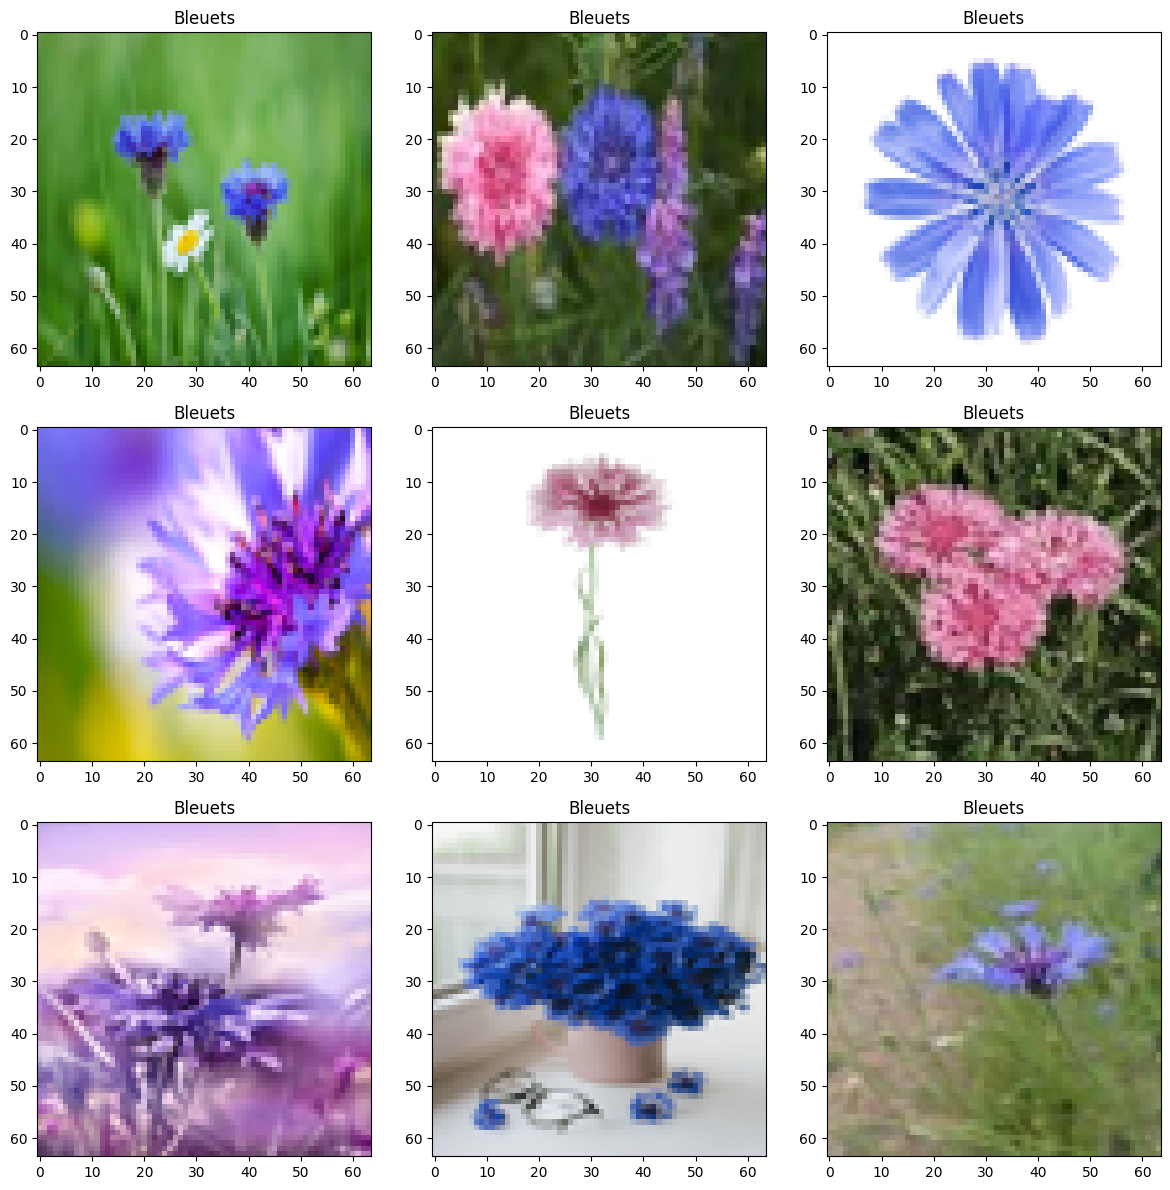

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)
    
print(labels)
plt.tight_layout()
plt.show()